Exploring Electronic Health Records


In [1]:
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt


cwd = os.getcwd()
print(cwd)

/content


In [2]:
# load all synthetic data into dfs
patients = pd.read_csv('https://raw.githubusercontent.com/henkberg/ehr_expl/main/synthea_sample_data_csv_apr2020/csv/patients.csv')
#patients.head()

conditions = pd.read_csv('https://raw.githubusercontent.com/henkberg/ehr_expl/main/synthea_sample_data_csv_apr2020/csv/conditions.csv')
#conditions.head()
careplans = pd.read_csv('https://raw.githubusercontent.com/henkberg/ehr_expl/main/synthea_sample_data_csv_apr2020/csv/careplans.csv')
#careplans.head()
encounters = pd.read_csv('https://raw.githubusercontent.com/henkberg/ehr_expl/main/synthea_sample_data_csv_apr2020/csv/encounters.csv')
#encounters.head()
procedures = pd.read_csv('https://raw.githubusercontent.com/henkberg/ehr_expl/main/synthea_sample_data_csv_apr2020/csv/procedures.csv')
medications = pd.read_csv('https://raw.githubusercontent.com/henkberg/ehr_expl/main/synthea_sample_data_csv_apr2020/csv/medications.csv')

Patient visualization

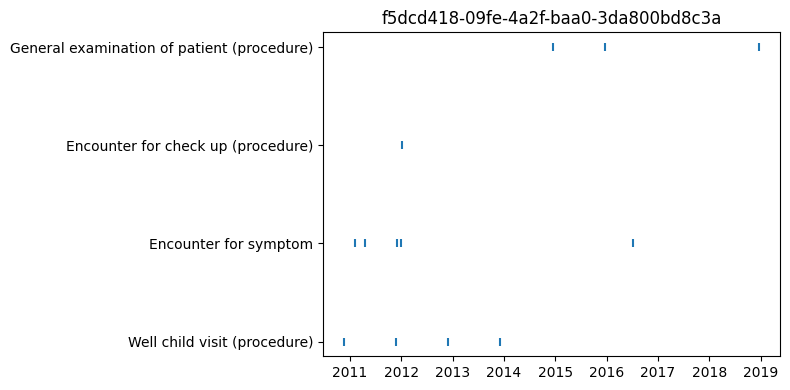

In [3]:
from datetime import datetime

patient_id = patients['Id'][4] # select a patient to study

# extract start- and end time of an event in encounters
info = encounters.loc[encounters['PATIENT'] == patient_id, ['START', 'STOP', 'ENCOUNTERCLASS', 'DESCRIPTION']]

date_format = '%Y-%m-%dT%H:%M:%SZ'
for i in info.index:
  info['START'][i] = datetime.strptime(info['START'][i], date_format)
  info['START'][i] = info['START'][i].date()
 
  info['STOP'][i]= datetime.strptime(info['STOP'][i], date_format)
  info['STOP'][i] = info['STOP'][i].date()
 
fig, ax = plt.subplots()

#ax.set_xlabel('Date')
#ax.set_ylabel('Event')

ax.scatter(info['START'], info['DESCRIPTION'], marker = '|')
plt.title(patient_id)


fig = plt.gcf()  
fig.set_size_inches(8, 4) 
plt.tight_layout()

plt.show()
#plt.savefig('patient_traj.png', dpi=300, bbox_inches='tight')

# note possible to use the information of event id to follow up this information in other data sets

Common conditions

<PandasArray>
[1248, 653, 563]
Length: 3, dtype: int64


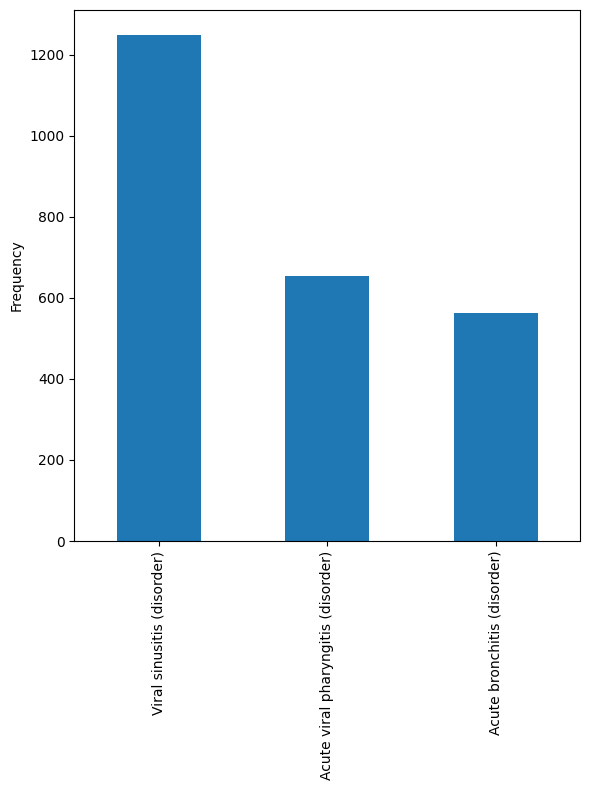

In [4]:
# reminder of df structure and content
# print(conditions.head())

# histogram over most common conditions
condition_count = conditions['DESCRIPTION'].value_counts()

top_3 = condition_count.head(3)
#print(conditions_str[2])

top_3.plot.bar()
#plt.xlabel('Condition')
plt.ylabel('Frequency')
print(top_3.array)

fig = plt.gcf()  
fig.set_size_inches(6, 8) 
plt.tight_layout()  

plt.show()
#plt.savefig('top_3_cond.png', dpi=300, bbox_inches='tight')
# NOTE: not unique patients, diagnosed multiple times with the same condition

Find and visualize treatments

In [5]:
def print_treatments(condition):
  treatments_c = careplans.loc[careplans['REASONDESCRIPTION'] == condition, 'DESCRIPTION']
  treatments_m = medications.loc[medications['REASONDESCRIPTION'] == condition, 'DESCRIPTION']
  treatments_p = procedures.loc[procedures['REASONDESCRIPTION'] == condition, 'DESCRIPTION']

  print('Careplans:')
  print(treatments_c.unique())
  print('Medications:')
  print(treatments_m.unique())
  print('Procedures:')
  print(treatments_p.unique())

conditions_str = top_3.index
print(conditions_str[0])
print_treatments(conditions_str[0])

print(conditions_str[1])
print_treatments(conditions_str[1])

print(conditions_str[2])
print_treatments(conditions_str[2])


Viral sinusitis (disorder)
Careplans:
[]
Medications:
['Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet']
Procedures:
[]
Acute viral pharyngitis (disorder)
Careplans:
[]
Medications:
['Penicillin V Potassium 250 MG Oral Tablet']
Procedures:
['Throat culture (procedure)']
Acute bronchitis (disorder)
Careplans:
['Respiratory therapy']
Medications:
['Acetaminophen 325 MG Oral Tablet'
 'Acetaminophen 21.7 MG/ML / Dextromethorphan Hydrobromide 1 MG/ML / doxylamine succinate 0.417 MG/ML Oral Solution']
Procedures:
['Sputum examination (procedure)'
 'Measurement of respiratory function (procedure)'
 'Plain chest X-ray (procedure)']


Common patterns in the rest of the data for patients with this conditions


In [6]:
def patient_patterns(condition):
  patientsID_cond = conditions.loc[conditions['DESCRIPTION'] == condition, ['PATIENT', 'START']]
  patientsID_cond['age'] = 0
  patientsID_cond['detection'] = 0
  patientsID_cond['gender'] = ''

  date_format = '%Y-%m-%d'
  for i in patientsID_cond.index:  
    patientsID_cond['gender'][i] = patients.loc[patients['Id'] == patientsID_cond['PATIENT'][i], 'GENDER'].array[0]
    age = patients.loc[patients['Id'] == patientsID_cond['PATIENT'][i], 'BIRTHDATE'].array[0]
    age = datetime.strptime(age, date_format)
    
    detection = datetime.strptime(patientsID_cond['START'][i], date_format)
    patientsID_cond['age'][i] = (detection - age).days // 365
    patientsID_cond['detection'][i] = detection

  #print(patientsID_cond)
  mean_age = patientsID_cond['age'].mean()
  print("Mean age: {:.2f} years".format(mean_age))

  #print(patientsID_cond['gender'].value_counts())
  g_ind = patientsID_cond['gender'].value_counts().index[0]
  g_pct = patientsID_cond['gender'].value_counts().array[0]/patientsID_cond['gender'].value_counts().array.sum()
  print("Percentage of {} patients: {:.2f}".format(g_ind, g_pct*100))



print(conditions_str[0])
patient_patterns(conditions_str[0])
print(conditions_str[1])
patient_patterns(conditions_str[1])
print(conditions_str[2])
patient_patterns(conditions_str[2])

# other ideas: previous conditions
# or multiple occurances of the same disease (more risk for recurrance etc?)
# need to take the values of the population into consideration

Viral sinusitis (disorder)


<ipython-input-6-65a658d8aaea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientsID_cond['gender'][i] = patients.loc[patients['Id'] == patientsID_cond['PATIENT'][i], 'GENDER'].array[0]
<ipython-input-6-65a658d8aaea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientsID_cond['age'][i] = (detection - age).days // 365
<ipython-input-6-65a658d8aaea>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientsID_cond['detection'

Mean age: 39.18 years
Percentage of F patients: 56.09
Acute viral pharyngitis (disorder)


<ipython-input-6-65a658d8aaea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientsID_cond['gender'][i] = patients.loc[patients['Id'] == patientsID_cond['PATIENT'][i], 'GENDER'].array[0]
<ipython-input-6-65a658d8aaea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientsID_cond['age'][i] = (detection - age).days // 365
<ipython-input-6-65a658d8aaea>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientsID_cond['detection'

Mean age: 36.40 years
Percentage of F patients: 50.08
Acute bronchitis (disorder)


<ipython-input-6-65a658d8aaea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientsID_cond['gender'][i] = patients.loc[patients['Id'] == patientsID_cond['PATIENT'][i], 'GENDER'].array[0]
<ipython-input-6-65a658d8aaea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientsID_cond['age'][i] = (detection - age).days // 365
<ipython-input-6-65a658d8aaea>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patientsID_cond['detection'

Mean age: 37.08 years
Percentage of M patients: 51.87


Interesting topics to study: 

1. Predictive modelling: For example a model that predicts the risk of a  patient developing a certain condition or requiring a particular treatment based on the data present, their medical history and/or demographic information? 

2. Treatment response: Is it possible to evaluate the effectiveness of different treatments for a particular condition and identify which treatments are most likely to lead to an effective response for different patients based on their medical history?

3. Healthcare operation: Is it possible to optimize healthcare resources at the hospital by predicting which patients are likely to require specific resources in the future? This can also be beneficial to reduce waiting times by a more informed scheduling of personel. 